In [38]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import shap
df = pd.read_csv('C:/Users/m/Desktop/Thesis Tasks/Jupyter Lab/Mental Health/Mental health 2Class.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Gender                                          253 non-null    object
 1   Worry_about_social_support_during_covid19       253 non-null    object
 2   Residence                                       253 non-null    object
 3   Stable_family_income                            253 non-null    object
 4   Living_with_parents                             253 non-null    object
 5   Relative_or_acquaintance_infected_with_covid19  253 non-null    object
 6   Worry_about_academic_delay                      253 non-null    object
 7   Disruption_of_daily_life                        253 non-null    object
 8   Exercise_during_covid19                         253 non-null    object
 9   Own_income                                      253 no

In [40]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Gender: Number of unique values 2
Worry_about_social_support_during_covid19: Number of unique values 2
Residence: Number of unique values 2
Stable_family_income: Number of unique values 2
Living_with_parents: Number of unique values 2
Relative_or_acquaintance_infected_with_covid19: Number of unique values 2
Worry_about_academic_delay: Number of unique values 2
Disruption_of_daily_life: Number of unique values 2
Exercise_during_covid19: Number of unique values 2
Own_income: Number of unique values 2
Quarrel_between_parents: Number of unique values 3
Sleep_status_hour_during_covid19: Number of unique values 3
Internet_browsing_hours_during_covid19: Number of unique values 4
Fear_of_getting_infected_with_covid19: Number of unique values 2
Mental_Health_Status: Number of unique values 2


# Categorical Features

In [41]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 13:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Mental_Health_Status')

Gender : ['Male' 'Female']
Male      213
Female     40
Name: Gender, dtype: int64
Worry_about_social_support_during_covid19 : ['Yes' 'No']
Yes    188
No      65
Name: Worry_about_social_support_during_covid19, dtype: int64
Residence : ['Urban' 'Rural']
Rural    157
Urban     96
Name: Residence, dtype: int64
Stable_family_income : ['No' 'Yes']
No     148
Yes    105
Name: Stable_family_income, dtype: int64
Living_with_parents : ['Yes' 'No']
Yes    183
No      70
Name: Living_with_parents, dtype: int64
Relative_or_acquaintance_infected_with_covid19 : ['Yes' 'No']
No     128
Yes    125
Name: Relative_or_acquaintance_infected_with_covid19, dtype: int64
Worry_about_academic_delay : ['Yes' 'No']
Yes    226
No      27
Name: Worry_about_academic_delay, dtype: int64
Disruption_of_daily_life : ['Yes' 'No']
Yes    212
No      41
Name: Disruption_of_daily_life, dtype: int64
Exercise_during_covid19 : ['No' 'Yes']
No     155
Yes     98
Name: Exercise_during_covid19, dtype: int64
Own_income : ['Yes' '

# Numerical Features

In [42]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 13:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")

Sleep_status_hour_during_covid19 : [2 1 3]
Internet_browsing_hours_during_covid19 : [3 4 2 1]


In [43]:
poor = df[df['Mental_Health_Status'] == 1]
better = df[df['Mental_Health_Status']==0]

In [44]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

# 📉 Features Visualization

In [45]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Students by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='Mental_Health_Status',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Mental Health Status by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

plt.show()

F:\New_Anaconda_Inst_Loc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



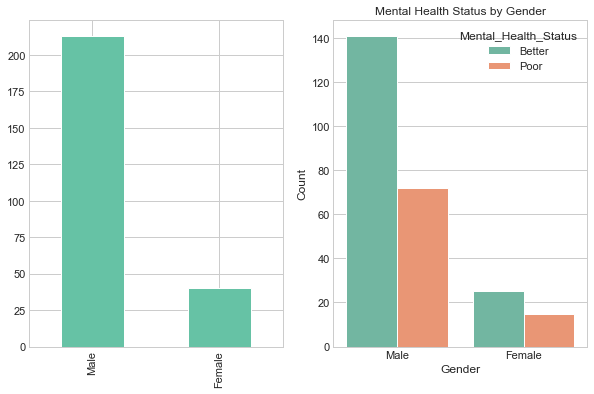

In [46]:
categorical_column_viz('Gender')

F:\New_Anaconda_Inst_Loc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



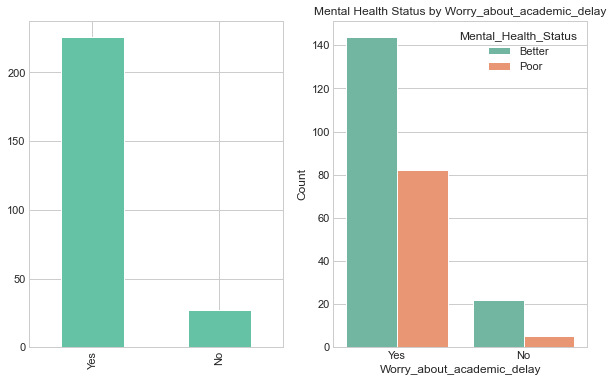

In [47]:
categorical_column_viz('Worry_about_academic_delay')

In [48]:
def feature_visualization(name):
    sns.set(style="darkgrid")
    sns.set_palette("hls", 1)
    fig, ax = plt.subplots(figsize=(7,5))
    ax = sns.countplot(x=name, hue="Mental_Health_Status", data=df)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:0.0f}'.format(height),
                ha="center") 

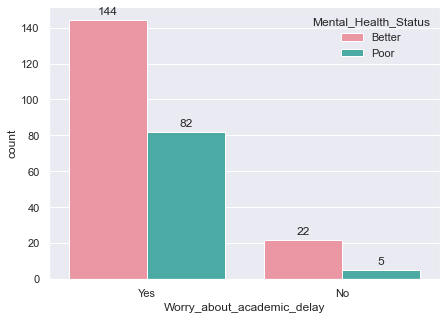

In [49]:
feature_visualization('Worry_about_academic_delay')

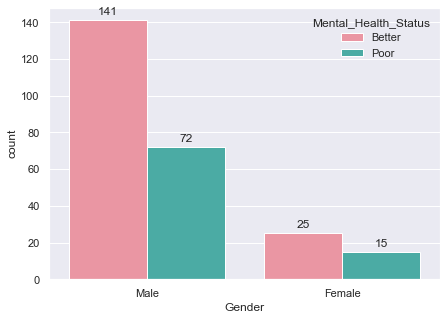

In [50]:
feature_visualization('Gender')

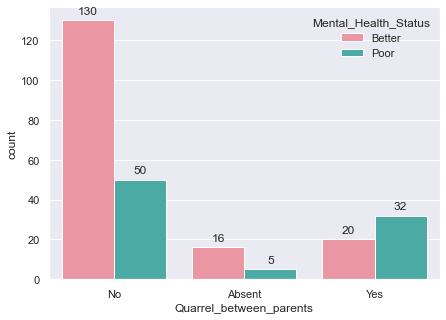

In [51]:
feature_visualization('Quarrel_between_parents')

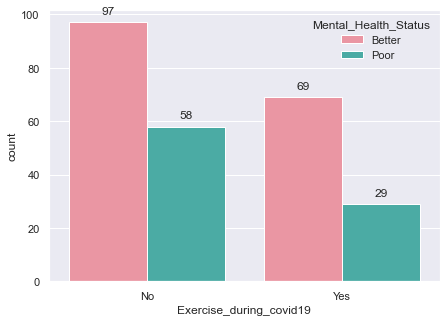

In [52]:
feature_visualization('Exercise_during_covid19')

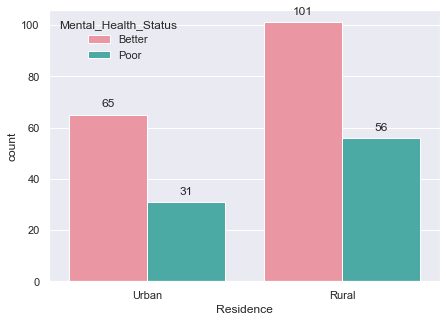

In [53]:
feature_visualization('Residence')

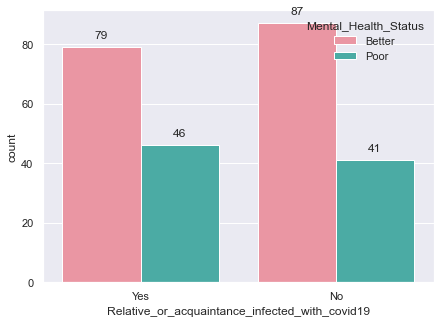

In [54]:
feature_visualization('Relative_or_acquaintance_infected_with_covid19')

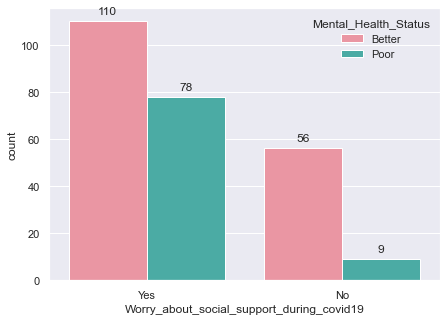

In [56]:
feature_visualization('Worry_about_social_support_during_covid19')

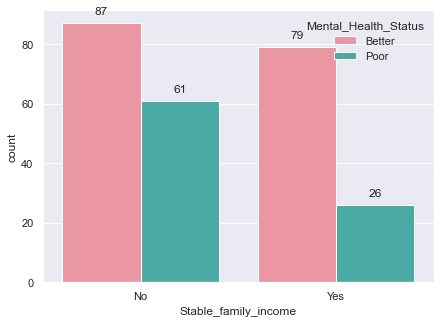

In [57]:
feature_visualization('Stable_family_income')

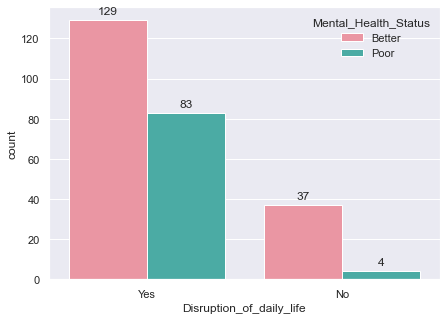

In [58]:
feature_visualization('Disruption_of_daily_life')